In [28]:
%cd ../..
%load_ext autoreload
%autoreload 2
import datajoint as dj; 
import os
# set the query cache path
dj.config['query_cache'] = os.path.expanduser('~/dj_query_cache')
# access the active connection object for the tables
conn = dj.conn() # if queries co-located with tables
# activate query caching for a namespace called 'main'
#conn.set_query_cache(query_cache='main')
conn.set_query_cache()
conn.purge_query_cache()

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams.update({'font.size': 20})
from pipeline import lab, get_schema_name, experiment, foraging_model, ephys, foraging_analysis, histology, ccf, report, psth_foraging
from pipeline.plot import unit_psth
from pipeline.plot.foraging_model_plot import plot_session_model_comparison, plot_session_fitted_choice, plot_unit_all_in_one
foraging_sessions = (foraging_analysis.SessionTaskProtocol & 'session_task_protocol=100').proj()

/
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
h2o, date, imec, unit = 'HH13', '2021-11-12', 1, 22
unit_key = (ephys.Unit() & (experiment.Session & f'session_date = "{date}"') & (lab.WaterRestriction & f'water_restriction_number = "{h2o}"') & {'insertion_number': imec + 1, 'unit_uid': unit}).fetch1("KEY")

In [ ]:
plot_unit_all_in_one(unit_key)

In [ ]:
len(psth_foraging.UnitPeriodLinearFit.key_source)

In [ ]:
import time
from datetime import datetime
last = 0
total = len(psth_foraging.UnitPeriodLinearFit.key_source)
while 1:
    this = len(psth_foraging.UnitPeriodLinearFit())
    print(f'{datetime.now()}: + {(this-last)/10} per sec, total {this}, {this/total:2%}')
    last = this
    time.sleep(10)

In [ ]:
len(psth_foraging.UnitPeriodActivity())

In [132]:
len(psth_foraging.UnitPeriodLinearFit())

711544

In [162]:
len(psth_foraging.UnitPeriodLinearFit.key_source - psth_foraging.UnitPeriodLinearFit)

5

In [ ]:
1 - len(psth_foraging.UnitPeriodActivity.key_source - psth_foraging.UnitPeriodActivity) / len(psth_foraging.UnitPeriodActivity.key_source)

In [169]:
1 - len(psth_foraging.UnitPeriodLinearFit.key_source - psth_foraging.UnitPeriodLinearFit) / len(psth_foraging.UnitPeriodLinearFit.key_source)

1.0

In [168]:
from pipeline.shell import print_current_jobs
print_current_jobs()

                                   reserve_count          oldest_job  \
table                                                                  
foraging_analysis.TrialStats       1             2022-09-16 02:29:54   
psth_foraging.UnitPeriodLinearFit  31            2022-09-30 20:45:58   

                                           newest_job  error_count  
table                                                               
foraging_analysis.TrialStats      2022-09-16 02:29:54  0            
psth_foraging.UnitPeriodLinearFit 2022-09-30 20:46:45  0            


,reserve_count,oldest_job,newest_job,error_count
table,,,,
foraging_analysis.TrialStats,1,2022-09-16 02:29:54,2022-09-16 02:29:54,0
psth_foraging.UnitPeriodLinearFit,31,2022-09-30 20:45:58,2022-09-30 20:46:45,0


In [61]:
s = dj.schema('map_v2_psth_foraging', create_schema=False)

In [150]:
s.jobs.delete()

In [157]:
s.jobs

table_name className of the table,key_hash key hash,"status if tuple is missing, the job is available",key structure containing the key,error_message error message returned if failed,error_stack error stack if failed,user database user,host system hostname,pid system process id,connection_id connection_id(),timestamp automatic timestamp


In [160]:
(s.jobs & 'status = "error"').fetch('key', 'error_message', limit=10, offset=0)

[array([], dtype=object), array([], dtype=object)]

In [ ]:
 s.jobs.fetch('key', order_by='pid')

In [76]:
%%time
len((ephys.Unit & foraging_analysis.SessionTaskProtocol - experiment.PhotostimForagingTrial) * psth_foraging.LinearModelPeriodToFit * psth_foraging.LinearModelBehaviorModelToFit * psth_foraging.LinearModel)

CPU times: user 23.4 ms, sys: 4.96 ms, total: 28.3 ms
Wall time: 396 ms


744723

In [79]:
len(ephys.Unit & foraging_analysis.SessionTaskProtocol - experiment.PhotostimForagingTrial)

35463

In [80]:
foraging_model.FittedSessionModel & experiment.PhotostimForagingTrial

subject_id institution 6 digit animal ID,session session number,model_id,n_trials,n_params,log_likelihood raw log likelihood of the model,aic AIC,bic BIC,lpt Likelihood-Per-Trial raw,lpt_aic Likelihood-Per-Trial with AIC penalty,lpt_bic Likelihood-Per-Trial with AIC penalty,prediction_accuracy non-cross-validated prediction accuracy,cross_valid_accuracy_fit cross-validated accuracy (fitting set),cross_valid_accuracy_test cross-validated accuracy (testing set),cross_valid_accuracy_test_bias_only accuracy predicted only by bias (testing set)


In [81]:
ephys.ProbeInsertion & experiment.PhotostimForagingTrial

subject_id institution 6 digit animal ID,session session number,insertion_number,probe unique identifier for this model of probe (e.g. part number),probe_type e.g. neuropixels_1.0,electrode_config_name user friendly name
494694,17,1,18005108522,neuropixels 1.0 - 3B,1-384
494694,18,1,18005107812,neuropixels 1.0 - 3B,1-384
494694,19,1,18005108522,neuropixels 1.0 - 3B,1-384
494694,20,1,18005107812,neuropixels 1.0 - 3B,1-384
494694,21,1,18005108522,neuropixels 1.0 - 3B,1-384
616134,20,1,18005108522,neuropixels 1.0 - 3B,1-384
616134,20,2,18005123392,neuropixels 1.0 - 3B,1-384
616134,21,1,18005108622,neuropixels 1.0 - 3B,1-384
616134,21,2,18005107871,neuropixels 1.0 - 3B,1-384


In [165]:
dj.U('subject_id', 'session').aggr(psth_foraging.UnitPeriodLinearFit.key_source-psth_foraging.UnitPeriodLinearFit, count='COUNT(*)')

subject_id institution 6 digit animal ID,session session number,count calculated attribute


In [101]:
key = {'subject_id': 473361, 'session': 42, 'insertion_number': 1, 'clustering_method': 'kilosort2', 'unit': 174, 'period': 'delay', 'behavior_model': 'best_aic', 'multi_linear_model': 'Q_rel + Q_tot + rpe'}
foraging_model.FittedSessionModel & key
foraging_model.FittedSessionModelComparison & key

subject_id institution 6 digit animal ID,session session number,model_comparison_idx
473361,42,0
473361,42,1
473361,42,2


In [ ]:
psth_foraging.UnitPeriodLinearFit.populate(key, display_progress=True)

In [135]:
psth_foraging.UnitPeriodActivity & {'subject_id': 473361, 'session': 42, 'insertion_number': 1, 'clustering_method': 'kilosort2', 'unit': 174, 'behavior_model': 'best_aic', 'multi_linear_model': 'Q_rel + Q_tot + rpe'}

subject_id institution 6 digit animal ID,session session number,insertion_number,clustering_method,unit,period,trial Actual trials,spike_counts,durations,firing_rates
473361,42,1,kilosort2,174,before_2,=BLOB=,=BLOB=,=BLOB=,=BLOB=
473361,42,1,kilosort2,174,delay,=BLOB=,=BLOB=,=BLOB=,=BLOB=
473361,42,1,kilosort2,174,go_1.2,=BLOB=,=BLOB=,=BLOB=,=BLOB=
473361,42,1,kilosort2,174,go_to_end,=BLOB=,=BLOB=,=BLOB=,=BLOB=
473361,42,1,kilosort2,174,iti_all,=BLOB=,=BLOB=,=BLOB=,=BLOB=
473361,42,1,kilosort2,174,iti_first_2,=BLOB=,=BLOB=,=BLOB=,=BLOB=
473361,42,1,kilosort2,174,iti_last_2,=BLOB=,=BLOB=,=BLOB=,=BLOB=


Check incomplete `psth_foraging.UnitPeriodActivity`

In [118]:
(ephys.Unit & psth_foraging.UnitPeriodActivity).aggr(psth_foraging.UnitPeriodActivity, count='COUNT(*)') & 'count<7'

subject_id institution 6 digit animal ID,session session number,insertion_number,clustering_method,unit,count calculated attribute


In [58]:
a = psth_foraging.UnitPeriodLinearFit.progress()

UnitPeriodLinearFit  Completed 711541 of 744723 (95.5%)   2022-09-30 20:03:29


In [ ]:
(dj.U('host') & s.jobs).aggr(s.jobs, count='COUNT(*)')

In [104]:
psth_foraging.UnitPeriodActivity.progress() 

UnitPeriodActivity   Completed 40845 of 40845 (100.0%)   2022-09-30 20:19:32


(0, 40845)

In [ ]:
psth_foraging.UnitPeriodActivity.populate(display_progress=True , reserve_jobs=True)

In [ ]:
psth_foraging.UnitPeriodActivity & {'subject_id': 490931, 'session': 22, 'insertion_number': 2, 'clustering_method': 'kilosort2', 'unit': 473}

In [ ]:
psth_foraging.UnitPeriodLinearFit.delete()

In [ ]:
compute_unit_period_activity(unit_key, 'go_to_end')

In [ ]:
psth_foraging.UnitPeriodActivity.populate()

In [ ]:
psth_foraging.UnitPeriodActivity()

In [ ]:
psth_foraging.UnitPeriodLinearFit.populate(display_progress=True)

In [ ]:
psth_foraging.UnitPeriodLinearFit.Param()

In [ ]:
%%time
(psth_foraging.UnitPeriodActivity & unit_key & {'period': 'go_to_end'}
                           ).fetch('trial', 'firing_rates', as_dict=True)[0]

In [ ]:
%%time
psth_foraging.compute_unit_period_activity(unit_key, 'go_to_end')

In [5]:
lv = lvs[0]

In [25]:
%%time
len(q_unit)

CPU times: user 4.41 ms, sys: 26 µs, total: 4.44 ms
Wall time: 197 ms


10850

In [26]:
%%time
df = pd.DataFrame((q_all & {'var_name': lv}).proj('beta', 'p', 't', 'area_num_units').fetch())

CPU times: user 2.95 s, sys: 71.9 ms, total: 3.02 s
Wall time: 3.35 s


In [25]:
dj.U('annotation').aggr(((ephys.Unit & foraging_sessions)* histology.ElectrodeCCFPosition.ElectrodePosition) * ccf.CCFAnnotation, count='count(*)').fetch(format='frame', order_by='count desc')[:30]

,count
annotation,
"Lateral septal nucleus, rostral (rostroventral) part",1024
"Secondary motor area, layer 5",705
"Prelimbic area, layer 5",630
"Anterior cingulate area, dorsal part, layer 5",524
Caudoputamen,480
"Secondary motor area, layer 2/3",407
"Lateral septal nucleus, ventral part",391
"Anterior cingulate area, ventral part, layer 5",350
Striatum,331


define queries...
done!
plotting t-distributions
   lv...
    ep...
    ep...
    ep...
    ep...
   lv...
    ep...
    ep...
    ep...
    ep...
   lv...
    ep...
    ep...
    ep...
    ep...
plotting weights distribution
    fetch data for go_to_end, Secondary motor area, layer 6a...
    fetch data for go_to_end, Anterior olfactory nucleus...
    fetch data for go_to_end, Prelimbic area, layer 5...
    fetch data for go_to_end, Orbital area, medial part, layer 5...
    fetch data for go_to_end, Orbital area, ventrolateral part, layer 5...
    fetch data for go_to_end, Mediodorsal nucleus of thalamus...
    fetch data for go_to_end, Secondary motor area, layer 5...
    fetch data for go_to_end, Dorsal peduncular area...
    fetch data for go_to_end, Posterior complex of the thalamus...
    fetch data for go_to_end, Orbital area, ventrolateral part, layer 2/3...
    fetch data for iti_all, Secondary motor area, layer 6a...
    fetch data for iti_all, Anterior olfactory nucleus...
  

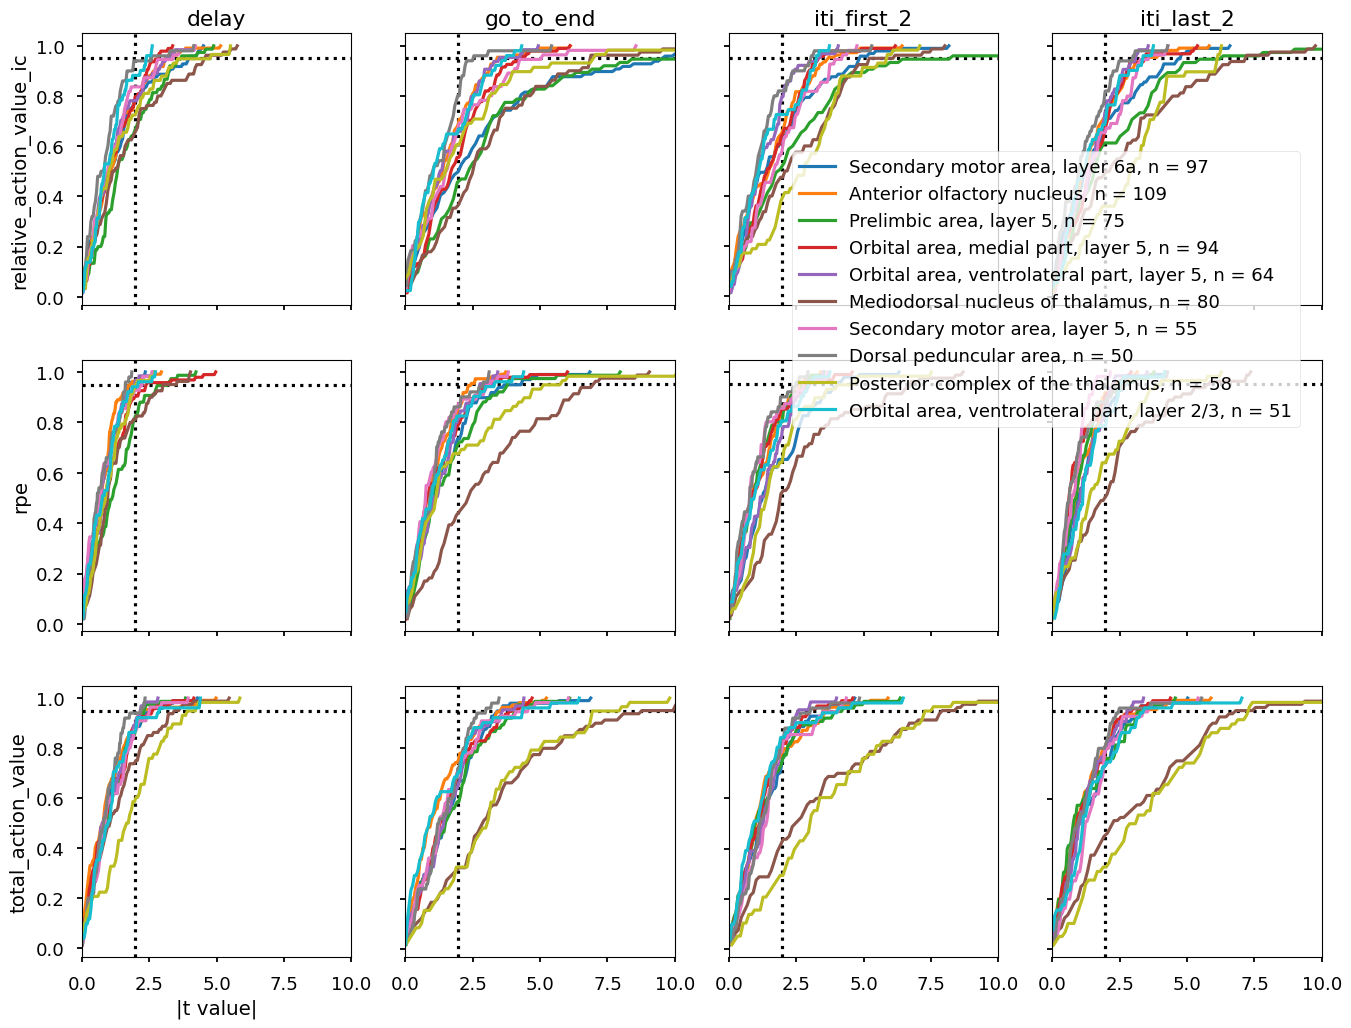

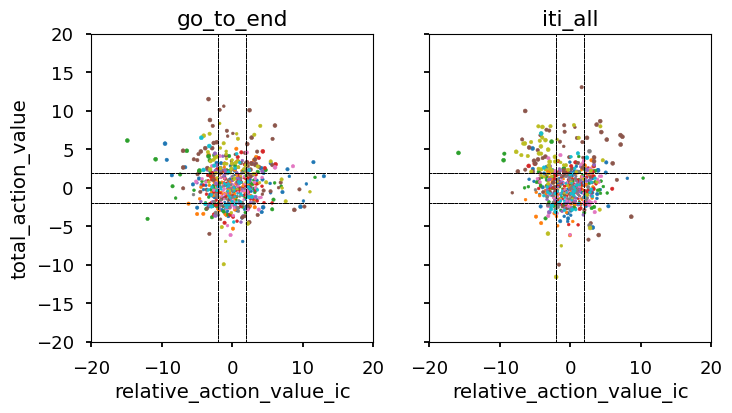

In [2]:
from pipeline.plot import unit_characteristic_plot
unit_characteristic_plot.plot_unit_period_fit(linear_model='Q_rel + Q_tot + rpe')

define queries...
done!
plotting t-distributions
   lv...
    ep...
    ep...
    ep...
    ep...
   lv...
    ep...
    ep...
    ep...
    ep...
   lv...
    ep...
    ep...
    ep...
    ep...
plotting weights distribution
    fetch data for go_to_end, Secondary motor area, layer 5...
    fetch data for go_to_end, Anterior olfactory nucleus...
    fetch data for go_to_end, Ventral medial nucleus of the thalamus...
    fetch data for go_to_end, Prelimbic area, layer 5...
    fetch data for go_to_end, Anterior cingulate area, dorsal part, layer 5...
    fetch data for go_to_end, Mediodorsal nucleus of thalamus...
    fetch data for go_to_end, Orbital area, medial part, layer 5...
    fetch data for go_to_end, Dorsal peduncular area...
    fetch data for go_to_end, Hypothalamus...
    fetch data for go_to_end, Secondary motor area, layer 6a...
    fetch data for iti_all, Secondary motor area, layer 5...
    fetch data for iti_all, Anterior olfactory nucleus...
    fetch data for iti_al

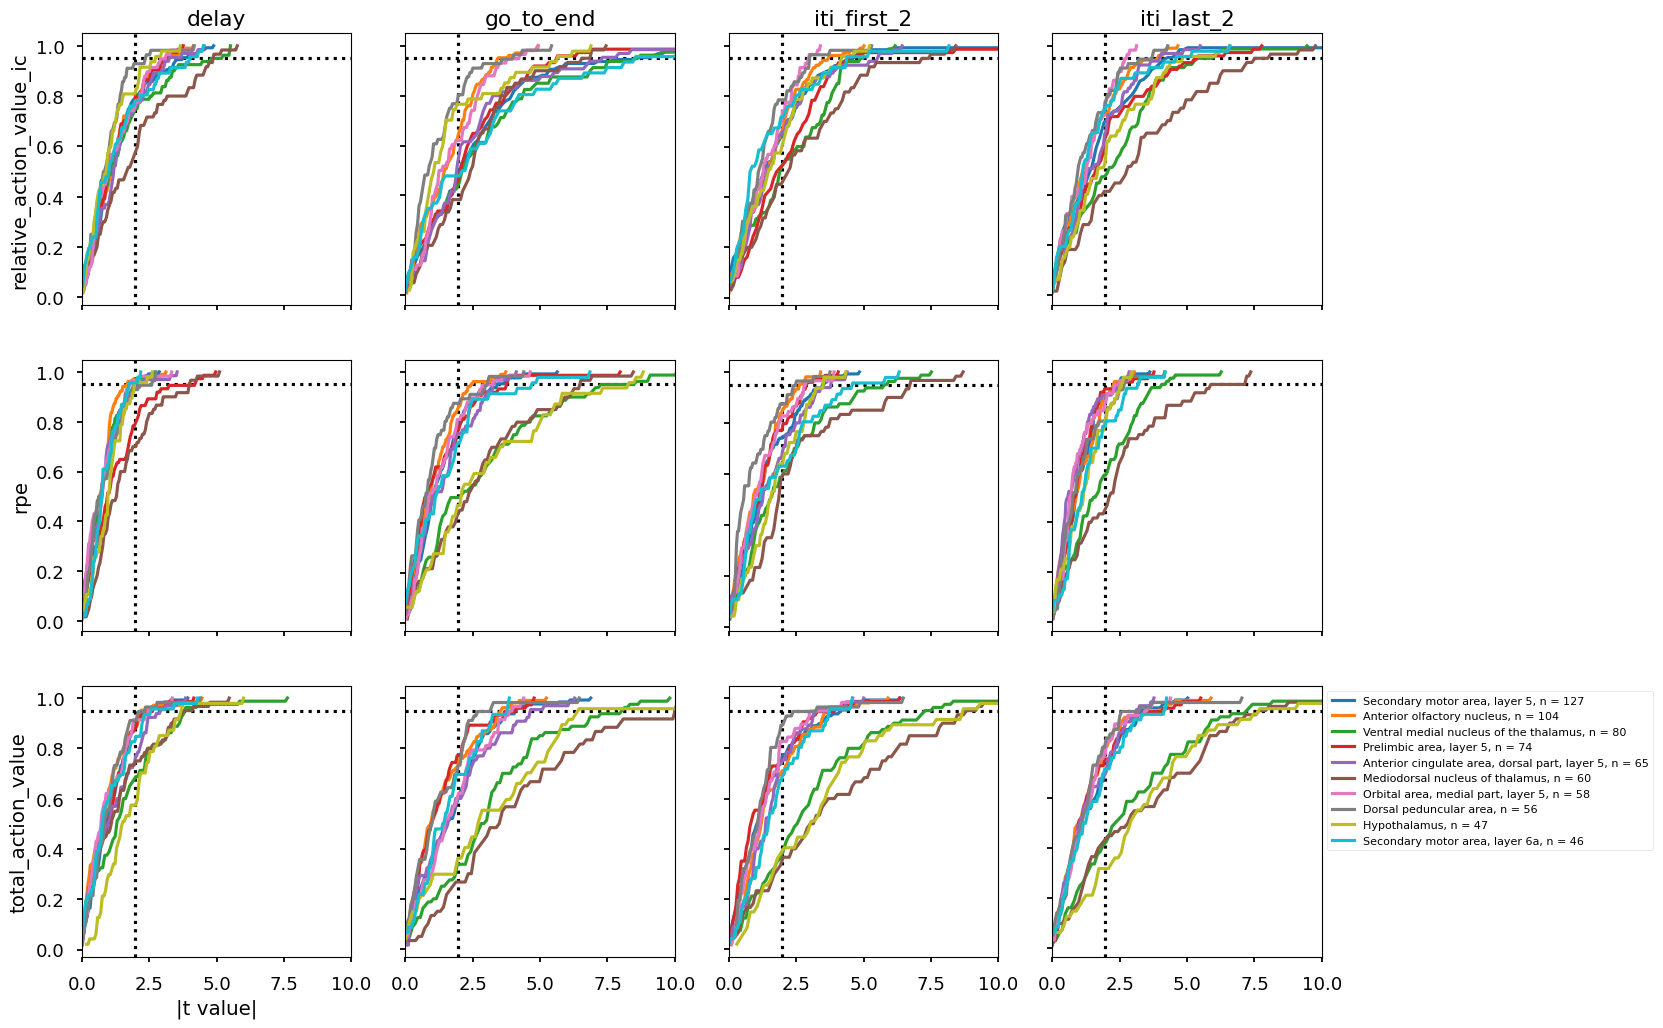

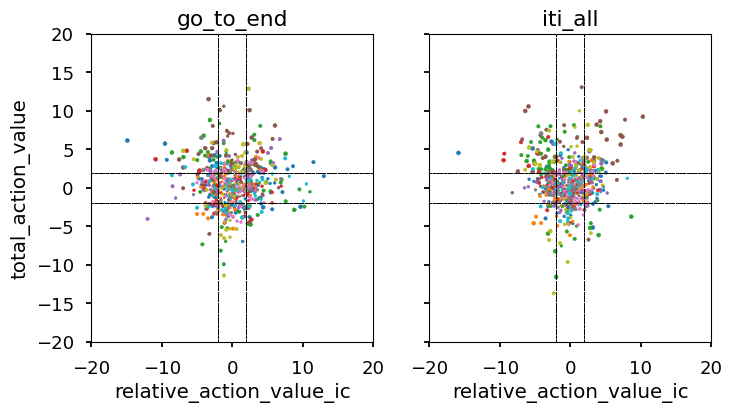

In [44]:
from pipeline.plot import unit_characteristic_plot
unit_characteristic_plot.plot_unit_period_fit(linear_model='Q_rel + Q_tot + rpe')

define queries...
done!
plotting t-distributions
plotting weights distribution


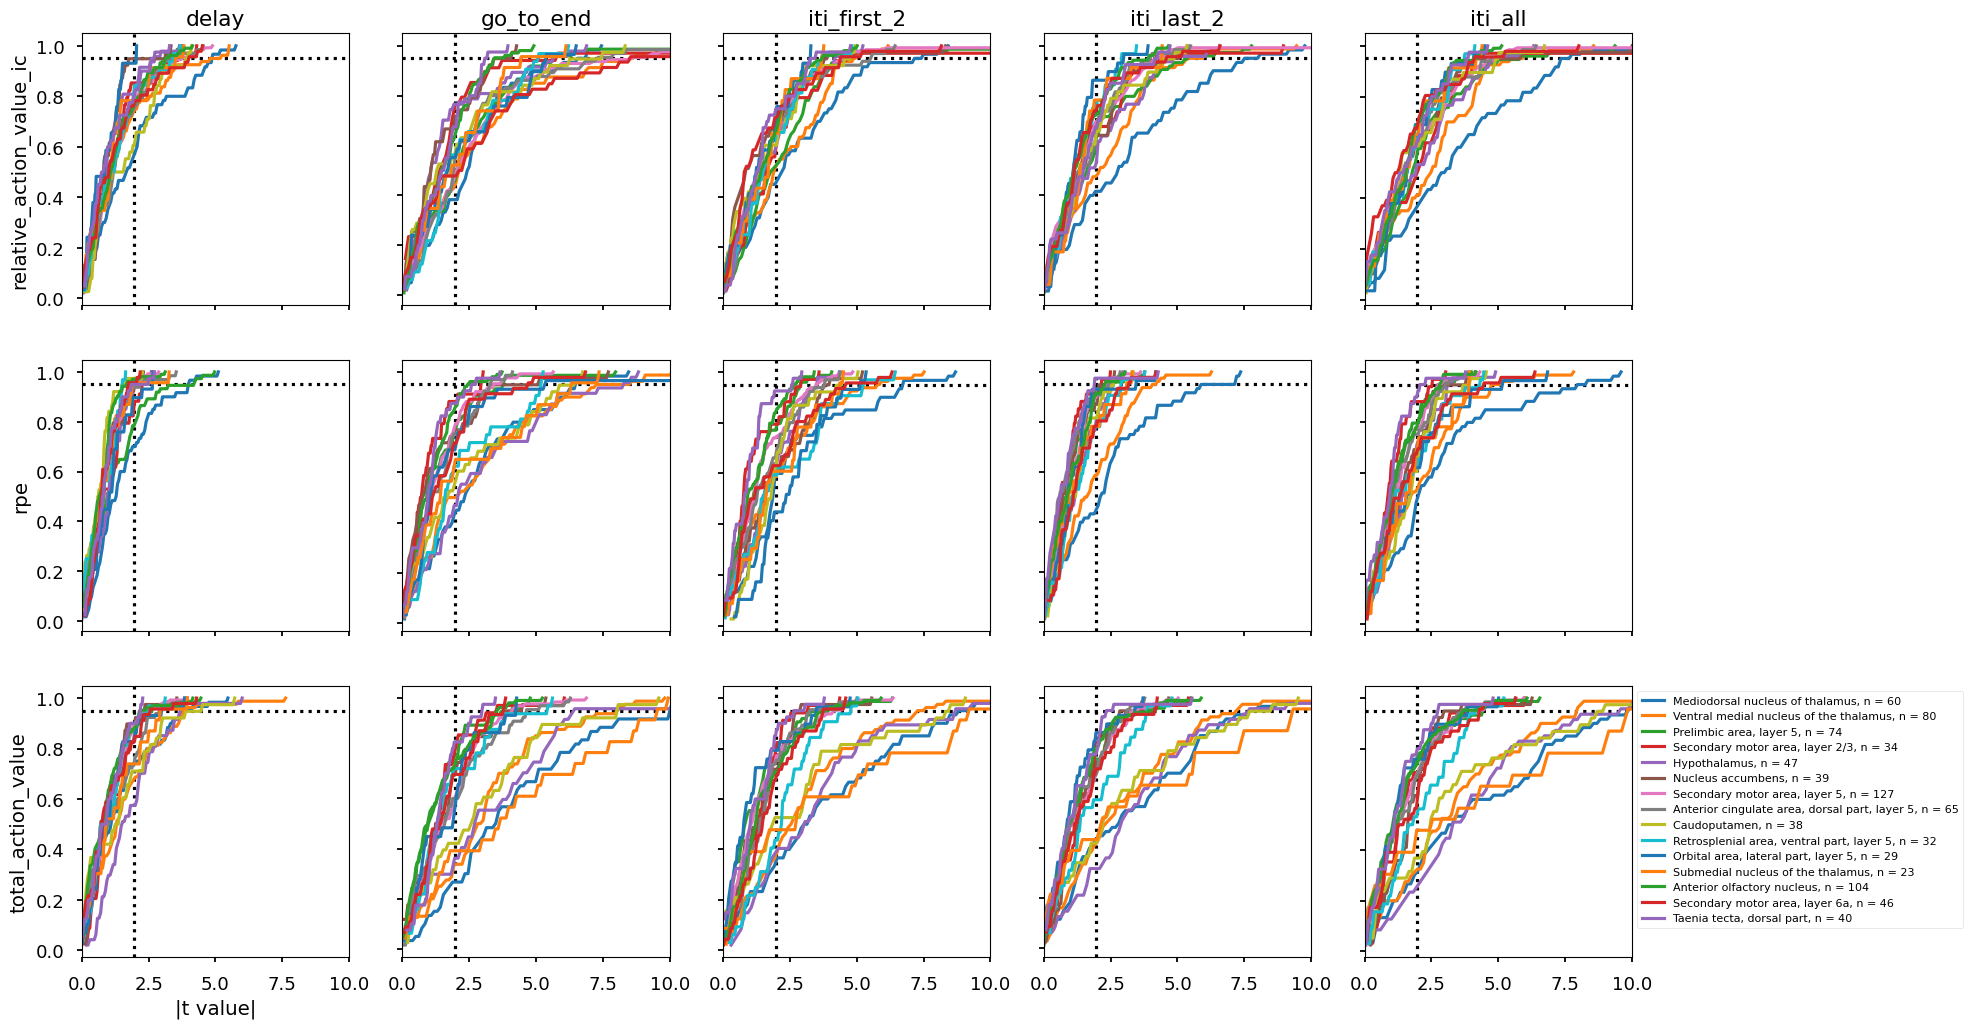

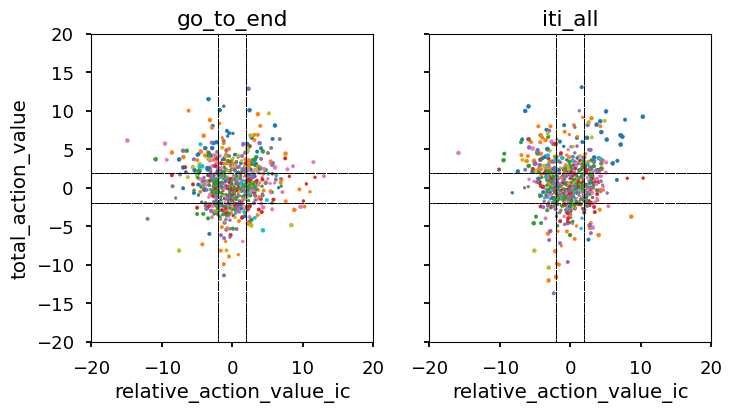

In [78]:
from pipeline.plot import unit_characteristic_plot
unit_characteristic_plot.plot_unit_period_fit(linear_model='Q_rel + Q_tot + rpe', order_by={'var_name': 'relative_action_value_ic', 'period': 'iti_all'}, first_n=15, min_num_unit=20)

define queries...
done!
plotting t-distributions
plotting weights distribution


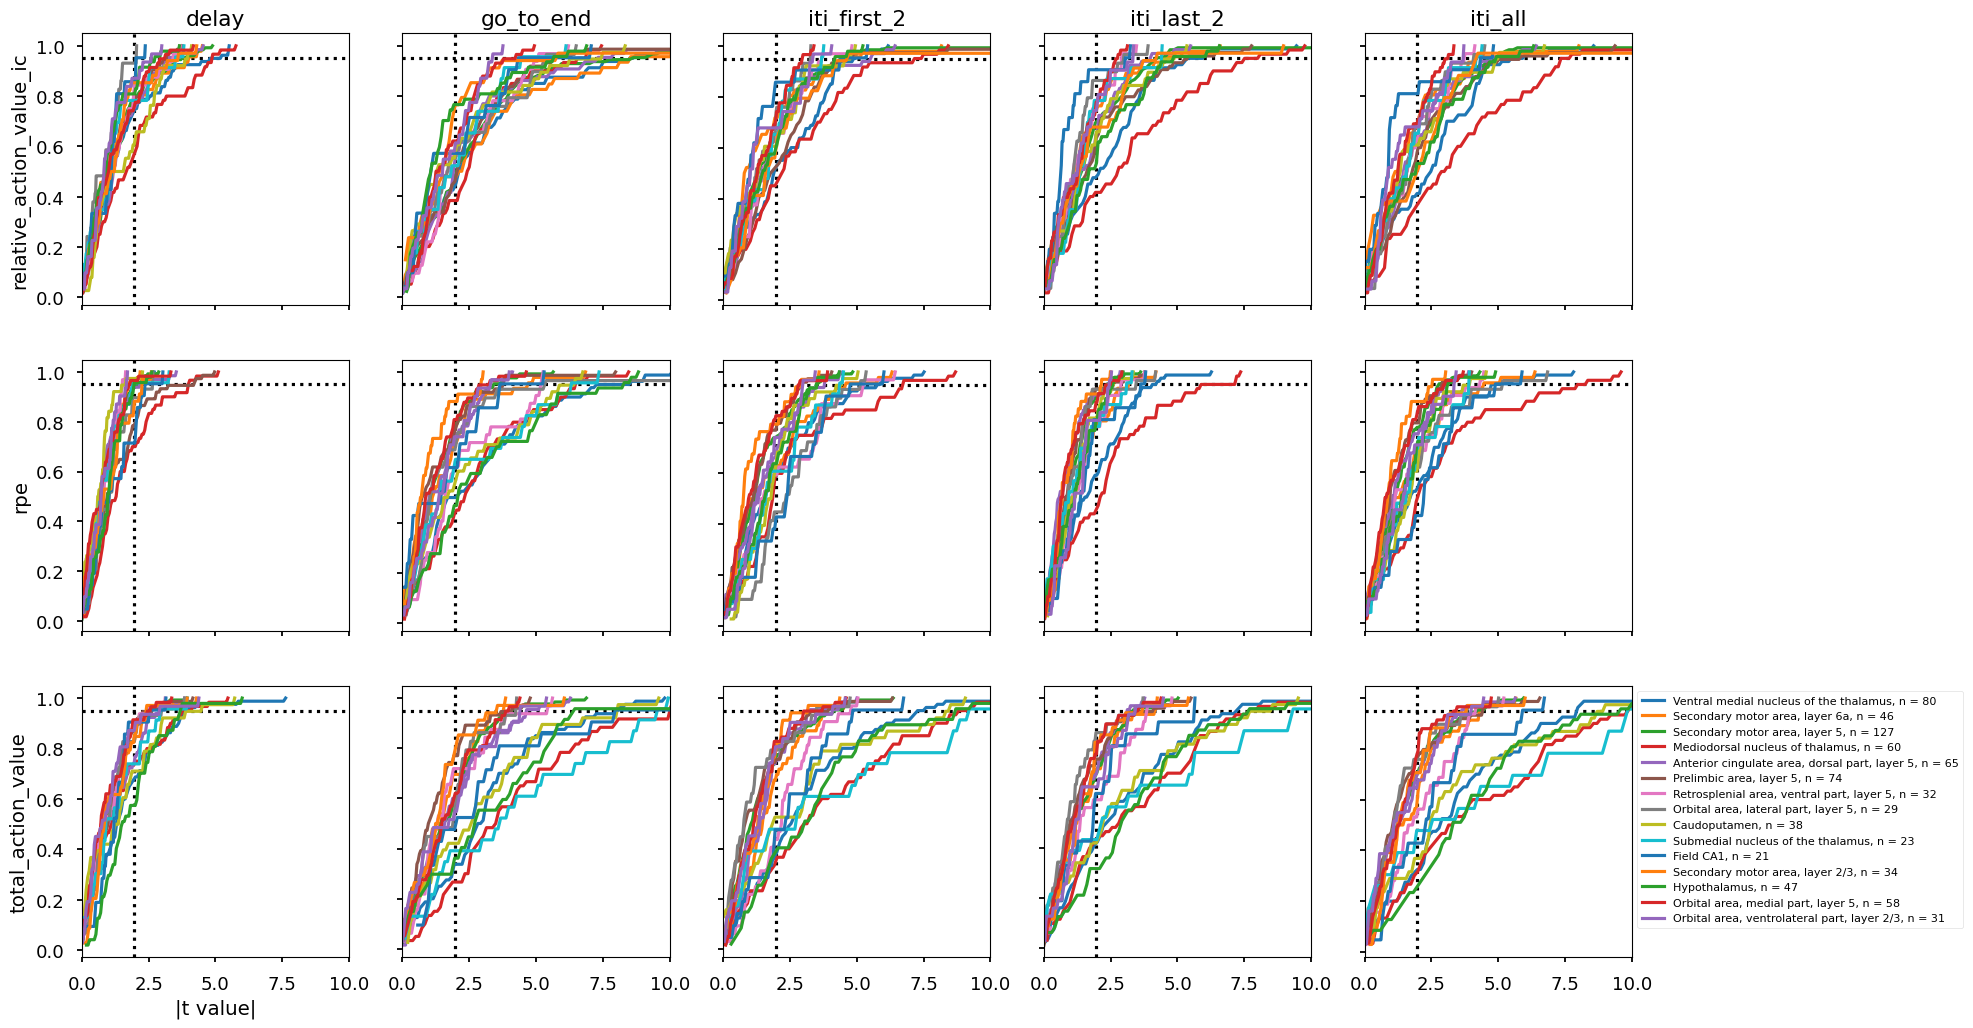

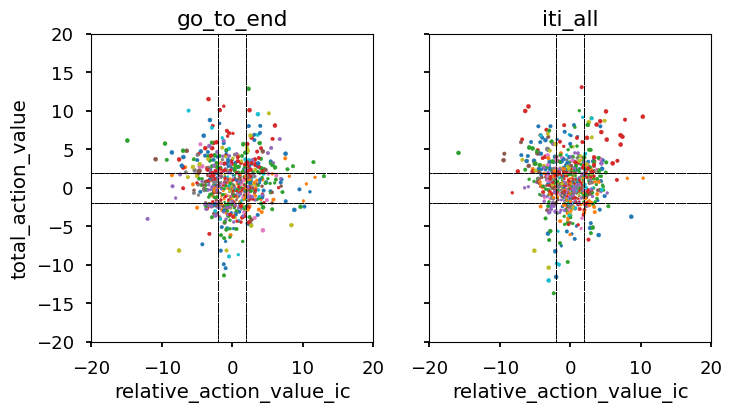

In [79]:
from pipeline.plot import unit_characteristic_plot
unit_characteristic_plot.plot_unit_period_fit(linear_model='Q_rel + Q_tot + rpe', order_by={'var_name': 'relative_action_value_ic', 'period': 'go_to_end'}, first_n=15, min_num_unit=20)

define queries...
done!
plotting t-distributions
plotting weights distribution


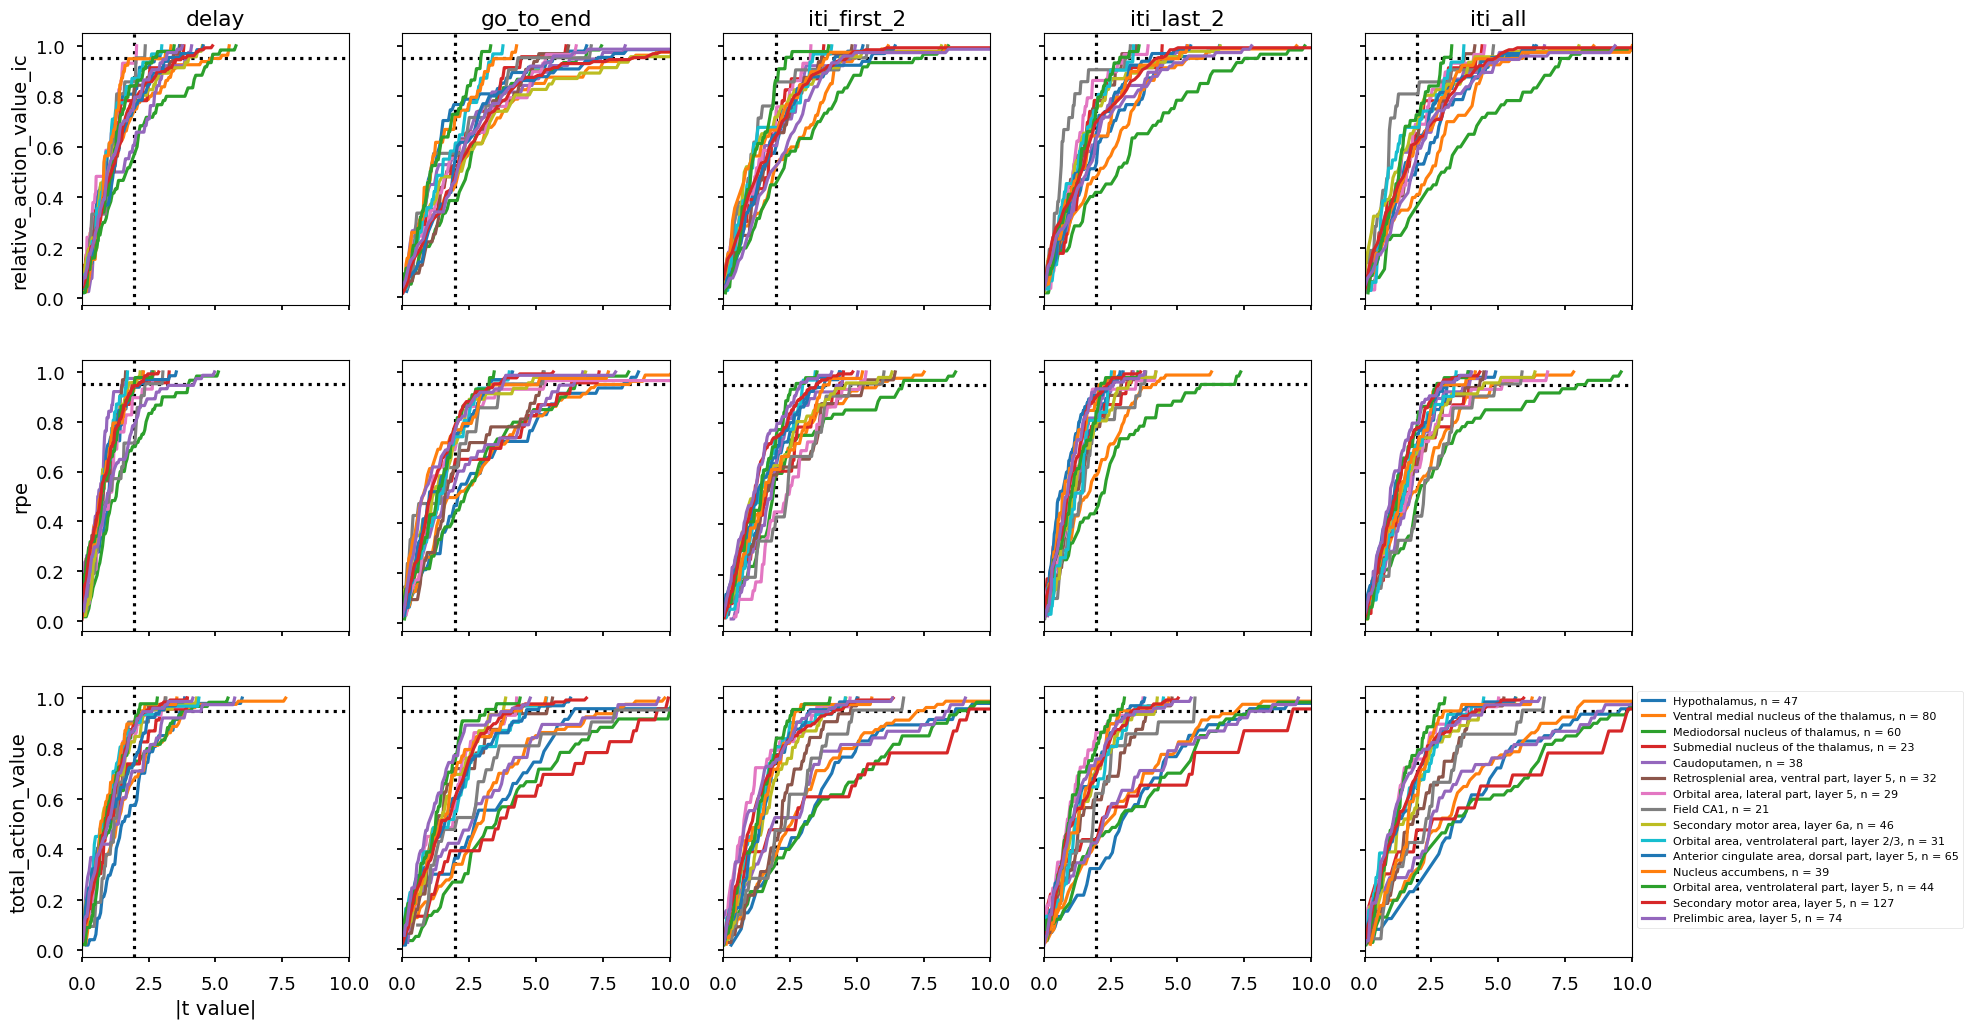

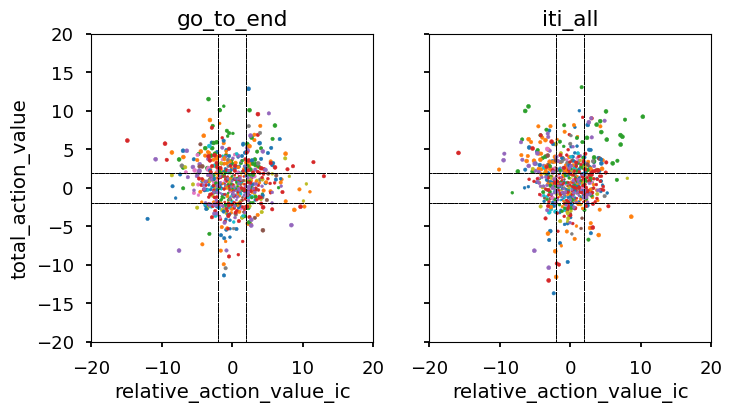

In [80]:
from pipeline.plot import unit_characteristic_plot
unit_characteristic_plot.plot_unit_period_fit(linear_model='Q_rel + Q_tot + rpe', order_by={'var_name': 'rpe', 'period': 'go_to_end'}, first_n=15, min_num_unit=20)

In [45]:
linear_model = linear_model='Q_rel + Q_tot + rpe'

q_unit = (((ephys.Unit & foraging_sessions) 
           * ephys.ClusterMetric * ephys.UnitStat * ephys.MAPClusterMetric.DriftMetric)
           #* (psth_foraging.UnitPeriodLinearFit * psth_foraging.UnitPeriodLinearFit.Param & {'multi_linear_model': linear_model}))
          & 'presence_ratio > 0.95'
          & 'amplitude_cutoff < 0.1'
          & 'isi_violation < 0.5' 
          & 'unit_amp > 70'
        #   # & 'drift_metric < 0.1'
          )

q_hist = (q_unit * histology.ElectrodeCCFPosition.ElectrodePosition) * ccf.CCFAnnotation
q_unit_n = dj.U('annotation').aggr(q_hist & psth_foraging.UnitPeriodLinearFit, area_num_units='count(*)')
q_hist *= q_unit_n

lvs = (psth_foraging.LinearModel.X & {'multi_linear_model': linear_model}).fetch('var_name')
q_all = ((psth_foraging.UnitPeriodLinearFit
          * psth_foraging.UnitPeriodLinearFit.Param
          * q_hist)
          & {'multi_linear_model': linear_model})   

In [55]:
dj.U('var_name', 'period') & q_all

var_name,period
relative_action_value_ic,before_2
rpe,before_2
total_action_value,before_2
relative_action_value_ic,delay
rpe,delay
total_action_value,delay
relative_action_value_ic,go_1.2
rpe,go_1.2
total_action_value,go_1.2
relative_action_value_ic,go_to_end


In [68]:
area_order = dj.U('annotation').aggr(q_all & {'var_name': 'relative_action_value_ic', 'period': 'iti_all'}, area_aver='AVG(ABS(t))')
area_order.fetch(order_by='area_aver desc', format='frame')

,area_aver
annotation,
Central medial nucleus of the thalamus,4.722758
"Primary somatosensory area, upper limb, layer 6b",4.476752
"Anterior cingulate area, dorsal part, layer 6a",4.464886
Ventral posteromedial nucleus of the thalamus,4.325526
Mediodorsal nucleus of thalamus,3.431009
...,...
mammillothalamic tract,0.838879
Midbrain,0.535995
Dorsomedial nucleus of the hypothalamus,0.220541


In [61]:
q_unit_n = dj.U('annotation').aggr(q_hist, area_num_units='count(*)')

In [62]:
q_unit_n

annotation,area_num_units calculated attribute
alveus,6
"Anterior cingulate area, dorsal part, layer 5",80
"Anterior cingulate area, dorsal part, layer 6a",1
Anterior olfactory nucleus,128
Anterior pretectal nucleus,20
Caudoputamen,38
Central medial nucleus of the thalamus,7
"Dentate gyrus, granule cell layer",10
"Dentate gyrus, molecular layer",10
"Dentate gyrus, polymorph layer",1


In [63]:
q_unit_n.fetch(order_by='area_num_units desc', format='frame')

,area_num_units
annotation,
"Secondary motor area, layer 5",233
Anterior olfactory nucleus,128
"Prelimbic area, layer 5",106
"Orbital area, medial part, layer 5",82
"Anterior cingulate area, dorsal part, layer 5",80
...,...
"Retrosplenial area, dorsal part, layer 6a",1
Midbrain,1
"Dentate gyrus, polymorph layer",1


In [43]:
(ephys.Unit & foraging_sessions) - psth_foraging.UnitPeriodLinearFit

subject_id institution 6 digit animal ID,session session number,insertion_number,clustering_method,unit,unit_uid unique across sessions/animals,unit_quality,probe_type e.g. neuropixels_1.0,electrode_config_name user friendly name,electrode_group electrode group,"electrode electrode index, starts at 0","unit_posx (um) estimated x position of the unit relative to probe's tip (0,0)","unit_posy (um) estimated y position of the unit relative to probe's tip (0,0)",spike_times (s) from the start of the first data point used in clustering,spike_sites array of electrode associated with each spike,spike_depths (um) array of depths associated with each spike,unit_amp,unit_snr,waveform average spike waveform
473361,48,1,kilosort2,0,0,multi,neuropixels 1.0 - 3B,1-384,0,3,11.0,20.0,=BLOB=,=BLOB=,=BLOB=,63.35717084639499,2.037323171136116,=BLOB=
473361,48,1,kilosort2,1,1,multi,neuropixels 1.0 - 3B,1-384,0,5,27.0,40.0,=BLOB=,=BLOB=,=BLOB=,46.06797680412372,1.4376379311450125,=BLOB=
473361,48,1,kilosort2,2,2,multi,neuropixels 1.0 - 3B,1-384,0,5,27.0,40.0,=BLOB=,=BLOB=,=BLOB=,68.86661664926929,2.085327217769442,=BLOB=
473361,48,1,kilosort2,3,3,multi,neuropixels 1.0 - 3B,1-384,0,5,27.0,40.0,=BLOB=,=BLOB=,=BLOB=,117.4679267288694,2.417756486213357,=BLOB=
473361,48,1,kilosort2,4,4,multi,neuropixels 1.0 - 3B,1-384,0,2,59.0,0.0,=BLOB=,=BLOB=,=BLOB=,69.3588689271255,2.593885954524757,=BLOB=
473361,48,1,kilosort2,5,5,multi,neuropixels 1.0 - 3B,1-384,0,3,11.0,20.0,=BLOB=,=BLOB=,=BLOB=,101.90127212389382,3.507763654357228,=BLOB=
473361,48,1,kilosort2,6,6,good,neuropixels 1.0 - 3B,1-384,0,5,27.0,40.0,=BLOB=,=BLOB=,=BLOB=,161.8863341968912,6.736960823547907,=BLOB=
473361,48,1,kilosort2,7,7,good,neuropixels 1.0 - 3B,1-384,0,6,59.0,40.0,=BLOB=,=BLOB=,=BLOB=,152.61616983967937,5.668397559322781,=BLOB=
473361,48,1,kilosort2,8,8,multi,neuropixels 1.0 - 3B,1-384,0,6,59.0,40.0,=BLOB=,=BLOB=,=BLOB=,93.28125,3.4395767898243683,=BLOB=
473361,48,1,kilosort2,9,9,good,neuropixels 1.0 - 3B,1-384,0,6,59.0,40.0,=BLOB=,=BLOB=,=BLOB=,53.60054347826087,2.2710418238493992,=BLOB=
